# Pandana network accessibility simple demo

This notebook uses [pandana](https://udst.github.io/pandana/network.html) (v0.2) to download street network and points-of-interest data from OpenStreetMap and then calculate network accessibility to the points of interest. Note: pandana currently only runs on Python 2.
  
For a more in-depth demo, check out [pandana-accessibility-demo-full.ipynb](pandana-accessibility-demo-full.ipynb)

In [1]:
import pandana, matplotlib.pyplot as plt
from pandana.loaders import osm
%matplotlib inline

In [2]:
bbox = [37.76, -122.35, 37.9, -122.17] #lat-long bounding box for berkeley/oakland
amenity = 'pub' #accessibility to this type of amenity
distance = 1500 #max distance in meters

## Download points of interest (POIs) and network data from OpenStreetMap

In [3]:
# first download the points of interest corresponding to the specified amenity type
pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags='"amenity"="{}"'.format(amenity))
pois[['amenity', 'name', 'lat', 'lon']].tail()

,amenity,name,lat,lon
id,,,,
3125416915,pub,Baggys,37.799867,-122.251968
3191146332,pub,Jupiter,37.869789,-122.267680
3565077293,pub,Independent Brewing Company,37.796430,-122.271185
3975043613,pub,J K's Brickhouse Sports Bar and Grill,37.802073,-122.288592
4096030691,pub,Kingfish,37.838437,-122.262396


In [4]:
# query the OSM API for the street network within the specified bounding box
network = osm.network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3])

# how many network nodes did we get for this bounding box?
len(network.node_ids)

22348

## Process the network data then compute accessibility

In [5]:
# identify nodes that are connected to fewer than some threshold of other nodes within a given distance
# do nothing with this for now, but see full example in other notebook for more
lcn = network.low_connectivity_nodes(impedance=1000, count=10, imp_name='distance')

In [6]:
# precomputes the range queries (the reachable nodes within this maximum distance)
# so, as long as you use a smaller distance, cached results will be used
network.precompute(distance + 1)

In [7]:
# initialize the underlying C++ points-of-interest engine
network.init_pois(num_categories=1, max_dist=distance, max_pois=7)

In [8]:
# initialize a category for this amenity with the locations specified by the lon and lat columns
network.set_pois(category='my_amenity', x_col=pois['lon'], y_col=pois['lat'])

In [9]:
# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='my_amenity', num_pois=7)

# each df cell represents the network distance from the node to each of the n POIs
access.head()

,1,2,3,4,5,6,7
id,,,,,,,
30366199,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
30366200,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
30374146,202.932999,639.367004,1264.124023,1333.255005,1356.292969,1393.644043,1412.536011
33917655,1456.061035,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
33947074,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000


## Plot the accessibility

In [10]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'plasma_r', 
               'edgecolor':'none'}

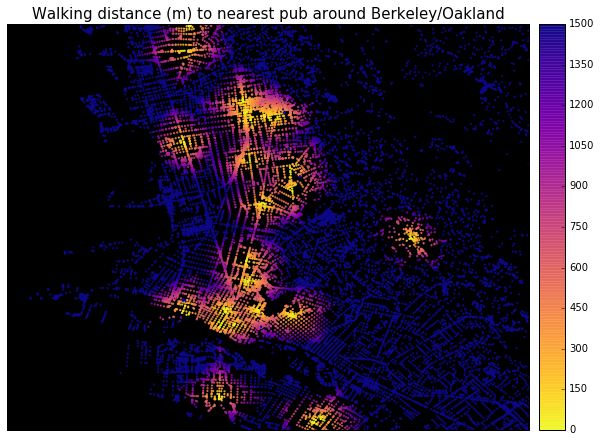

In [11]:
# plot the distance to the nth nearest amenity
n = 1
bmap, fig, ax = network.plot(access[n], bbox=bbox, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
ax.set_axis_bgcolor('k')
ax.set_title('Walking distance (m) to nearest {} around Berkeley/Oakland'.format(amenity), fontsize=15)
fig.savefig('images/accessibility-east-bay.png', dpi=200, bbox_inches='tight')
plt.show()

For a more in-depth demo, check out [pandana-accessibility-demo-full.ipynb](pandana-accessibility-demo-full.ipynb)